<a href="https://colab.research.google.com/github/vrushabhlandage/Data-analytics/blob/main/WORLD_POPULATION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploratory Data Analysis : US Accidents


---
* Source: Kaggle " https://www.kaggle.com/code/hasibalmuzdadid/world-population-analysis/data "

* This will help to analyse world's countrywise population.
---

* *Import essential liebrries*

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
from numpy import dtype
import folium
from folium import plugins
from folium.plugins import HeatMap
from plotly import express as px

Creating dataframe from uploaded csv file

In [ ]:
df = pd.read_csv('world_population.csv')

In [ ]:
pd.set_option('display.max_columns', None)
print(df)

     Rank CCA3            Country           Capital Continent  \
0      36  AFG        Afghanistan             Kabul      Asia   
1     138  ALB            Albania            Tirana    Europe   
2      34  DZA            Algeria           Algiers    Africa   
3     213  ASM     American Samoa         Pago Pago   Oceania   
4     203  AND            Andorra  Andorra la Vella    Europe   
..    ...  ...                ...               ...       ...   
229   226  WLF  Wallis and Futuna          Mata-Utu   Oceania   
230   172  ESH     Western Sahara          El Aaiún    Africa   
231    46  YEM              Yemen             Sanaa      Asia   
232    63  ZMB             Zambia            Lusaka    Africa   
233    74  ZWE           Zimbabwe            Harare    Africa   

     2022 Population  2020 Population  2015 Population  2010 Population  \
0           41128771         38972230         33753499         28189672   
1            2842321          2866849          2882481          29133

No of Rows = 234  (countries)

No of Columns = 17

## Data Prepration and Cleaning

In [ ]:
df.columns

Index(['Rank', 'CCA3', 'Country', 'Capital', 'Continent', '2022 Population',
       '2020 Population', '2015 Population', '2010 Population',
       '2000 Population', '1990 Population', '1980 Population',
       '1970 Population', 'Area (km²)', 'Density (per km²)', 'Growth Rate',
       'World Population Percentage'],
      dtype='object')

In [ ]:
df['2022 Population'].sum()

7973413042

Sort dataframe acording to 2022 Population in descending order

In [ ]:
countries_desc = df.sort_values(by=['2022 Population'], ascending=False)

In [ ]:
desc = countries_desc.iloc[:, [2,5]]

In [ ]:
desc[0:20]

,Country,2022 Population
41,China,1425887337
92,India,1417173173
221,United States,338289857
93,Indonesia,275501339
156,Pakistan,235824862
149,Nigeria,218541212
27,Brazil,215313498
16,Bangladesh,171186372
171,Russia,144713314
131,Mexico,127504125


Sort dataframe acording to 2022 Population in ascending order

In [ ]:
countries_asc = df.sort_values(by=['2022 Population'], ascending=True)

In [ ]:
asc = countries_asc.iloc[:, [2,5]]

In [ ]:
asc[0:20]

,Country,2022 Population
226,Vatican City,510
209,Tokelau,1871
150,Niue,1934
64,Falkland Islands,3780
137,Montserrat,4390
177,Saint Pierre and Miquelon,5862
173,Saint Barthelemy,10967
216,Tuvalu,11312
229,Wallis and Futuna,11572
142,Nauru,12668


top 20 populated countries bar graph acording to 2022 Population

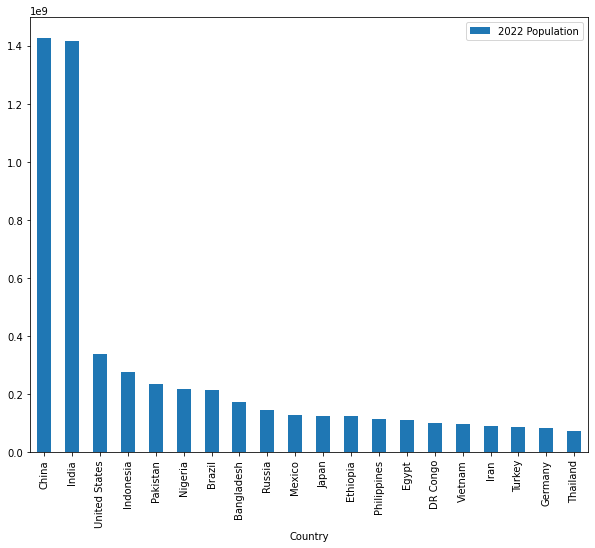

In [ ]:
desc[0:20].plot(x='Country', y='2022 Population', kind="bar",figsize = (10,8))

top 20 populated countries bar graph acording to 2022 Population

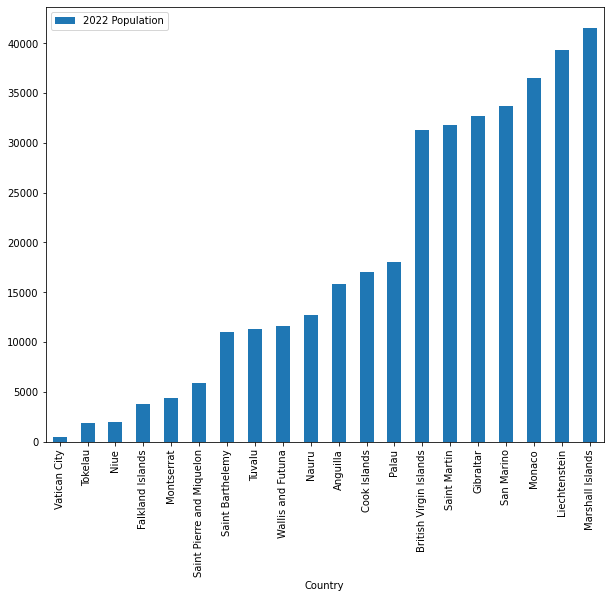

In [ ]:
asc[0:20].plot(x='Country', y='2022 Population', kind="bar",figsize = (10,8))

Finding unique values of 'Continent' column

In [ ]:
df.Continent.unique()

array(['Asia', 'Europe', 'Africa', 'Oceania', 'North America',
       'South America'], dtype=object)

Creating dataframe of every single continent by filtering original dataframe and sorting them in descending order

In [ ]:
dfAsia = df[(df['Continent'] == 'Asia')]
asi = dfAsia.sort_values(by=['2022 Population'], ascending=False)


In [ ]:
dfEurope    = df[(df['Continent'] == 'Europe')]
eur = dfEurope.sort_values(by=['2022 Population'], ascending=False)


In [ ]:
dfAfrica    = df[(df['Continent'] == 'Africa')]
afr = dfAfrica.sort_values(by=['2022 Population'], ascending=False)

In [ ]:
dfOceania    = df[(df['Continent'] == 'Oceania')]
ocean = dfOceania.sort_values(by=['2022 Population'], ascending=False)


In [ ]:
dfNorthAmerica =df[(df['Continent'] == 'North America')]
na = dfNorthAmerica.sort_values(by=['2022 Population'], ascending=False)


In [ ]:
dfSouthAmerica =df[(df['Continent'] == 'South America')]
sa = dfSouthAmerica.sort_values(by=['2022 Population'], ascending=False)

Calculating sum of every continents population

In [ ]:
sumasia = dfAsia['2022 Population'].sum()
sumasia

4721383274

In [ ]:
sumOceania = dfOceania['2022 Population'].sum()
sumOceania

45038554

In [ ]:
sumAfrica = dfAfrica['2022 Population'].sum()
sumAfrica

1426730932

In [ ]:
sumNorthAmerica = dfNorthAmerica['2022 Population'].sum()
sumNorthAmerica

600296136

In [ ]:
sumSouthAmerica = dfSouthAmerica['2022 Population'].sum()
sumSouthAmerica

436816608

In [ ]:
sumeurope = dfEurope['2022 Population'].sum()
sumeurope

743147538

Creating another dataframe of sum of continents

In [ ]:
data = [('Asia',4721383274 ),
        ('Oceania',45038554),
        ('Africa',1426730932),
        ('SouthAmerica', 436816608),
        ('Europe', 743147538),
        ('NorthAmerica', 600296136)]
  
  
# create DataFrame using data
df1 = pd.DataFrame(data, columns =['Continent', 'Population'])
  

In [ ]:
df1

,Continent,Population
0,Asia,4721383274
1,Oceania,45038554
2,Africa,1426730932
3,SouthAmerica,436816608
4,Europe,743147538
5,NorthAmerica,600296136


In [ ]:
df1.sum()

Continent     AsiaOceaniaAfricaSouthAmericaEuropeNorthAmerica
Population                                         7973413042
dtype: object

In [ ]:
df['2022 Population'].sum()

7973413042

Sorting dataframe of continents sum in descending order

In [ ]:
continent_desc = df1.sort_values(by=['Population'], ascending=False)

In [ ]:
continent_desc

,Continent,Population
0,Asia,4721383274
2,Africa,1426730932
4,Europe,743147538
5,NorthAmerica,600296136
3,SouthAmerica,436816608
1,Oceania,45038554


Bar graph of continents population 2022

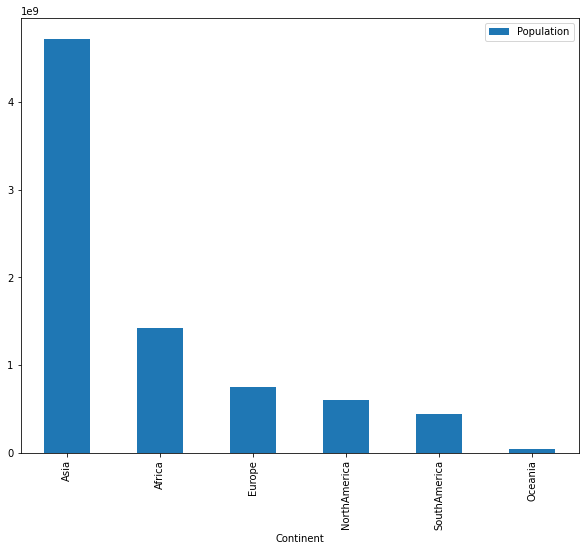

In [ ]:
continent_desc.plot(x='Continent', y='Population', kind="bar", figsize = (10,8))

Pie chart of continents population(2022) and its percentage 

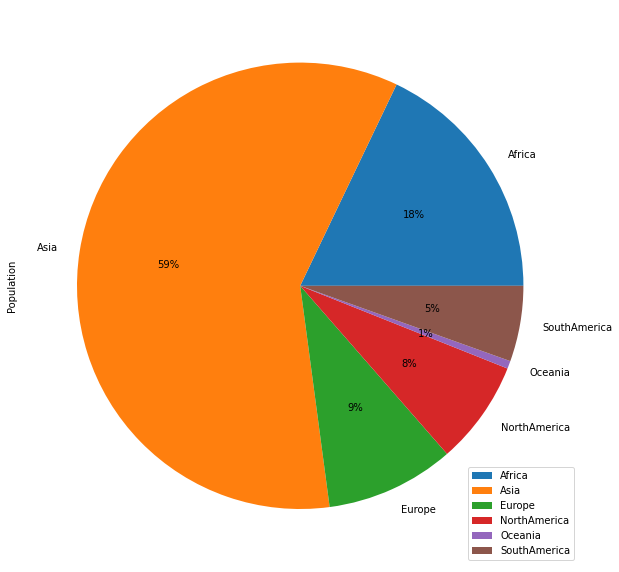

In [ ]:
df1.groupby(['Continent']).sum().plot(kind='pie', y='Population', autopct='%1.0f%%', figsize=(10, 15))

choropleth map of continents population 2022

In [ ]:
fig = px.choropleth(df, locations='Country',locationmode="country names", color='2022 Population', scope= 'world') 
fig.show()

Bar graph of asia's population in 2022

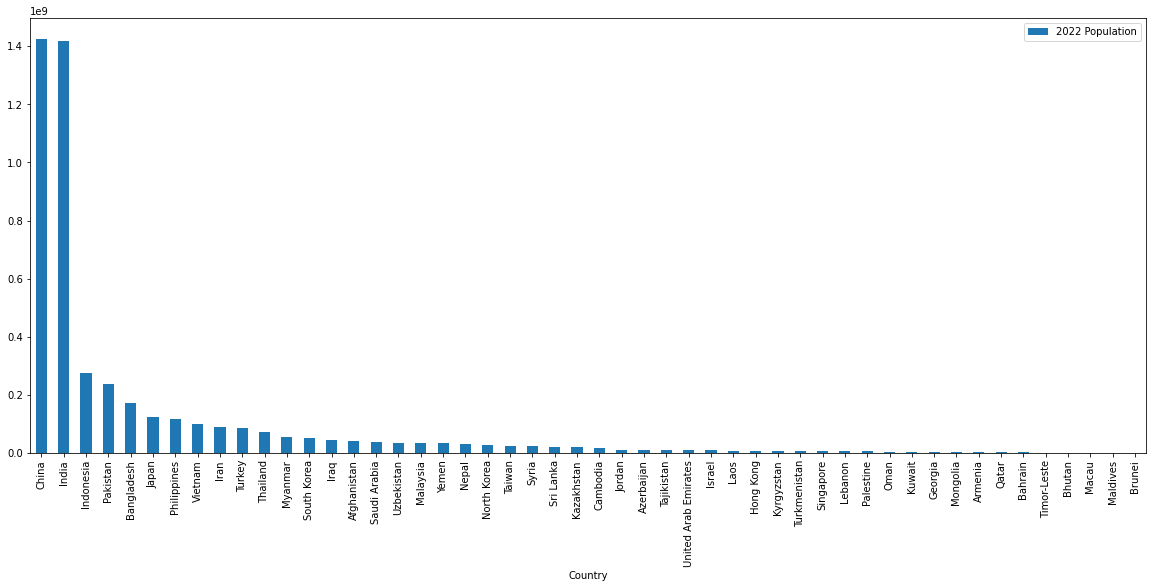

In [ ]:
asi.plot(x='Country', y='2022 Population', kind="bar", figsize = (20,8))

Bar graph of Eaurope's population in 2022

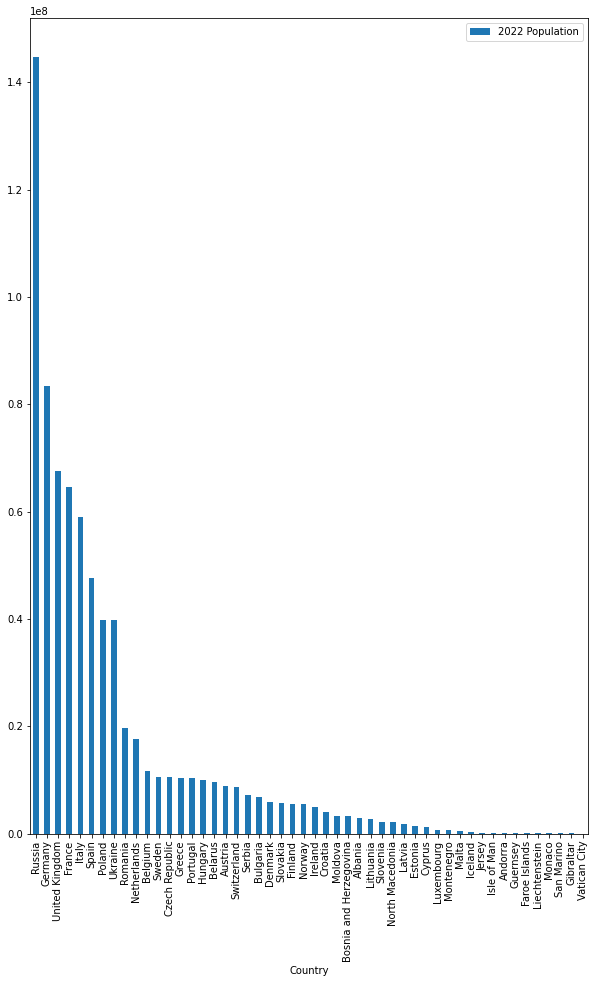

In [ ]:
eur.plot(x='Country', y='2022 Population', kind="bar", figsize = (10,15))

Bar graph of Africa's population in 2022

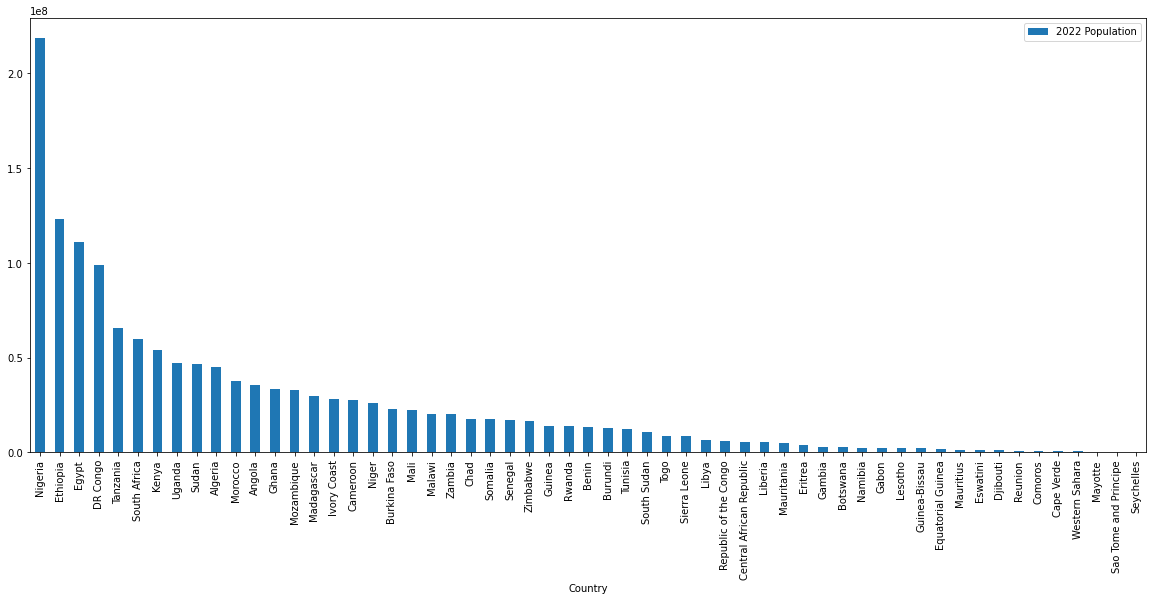

In [ ]:
afr.plot(x='Country', y='2022 Population', kind="bar", figsize = (20,8))

Bar graph of North America's population in 2022

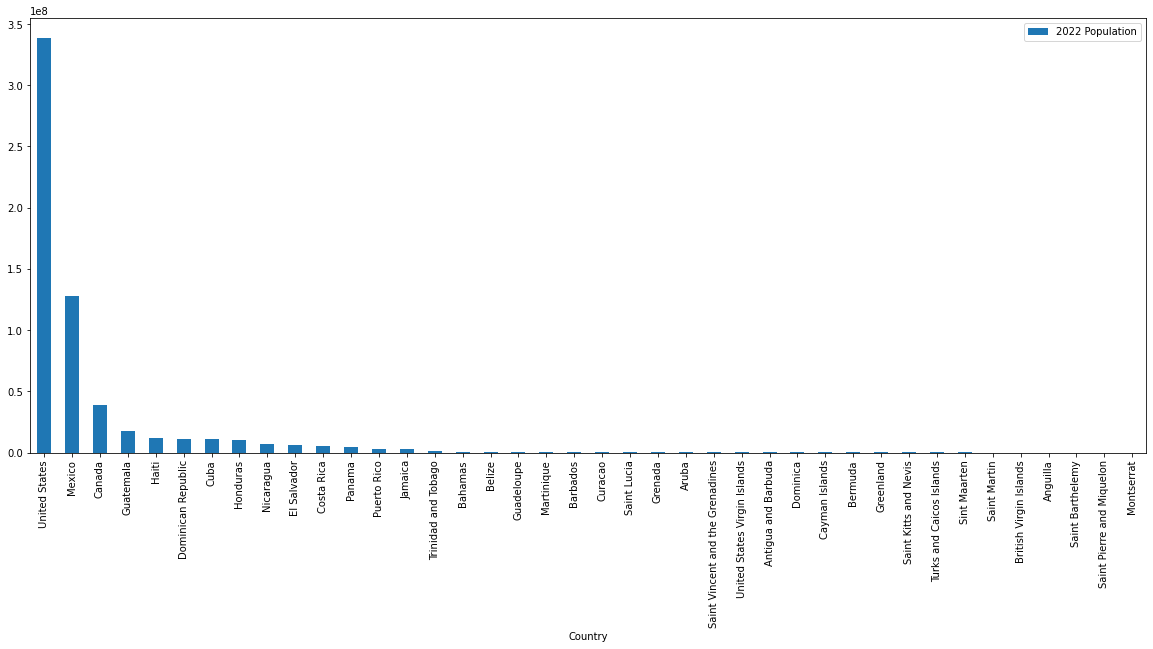

In [ ]:
na.plot(x='Country', y='2022 Population', kind="bar", figsize = (20,8))

Bar graph of South America's population in 2022

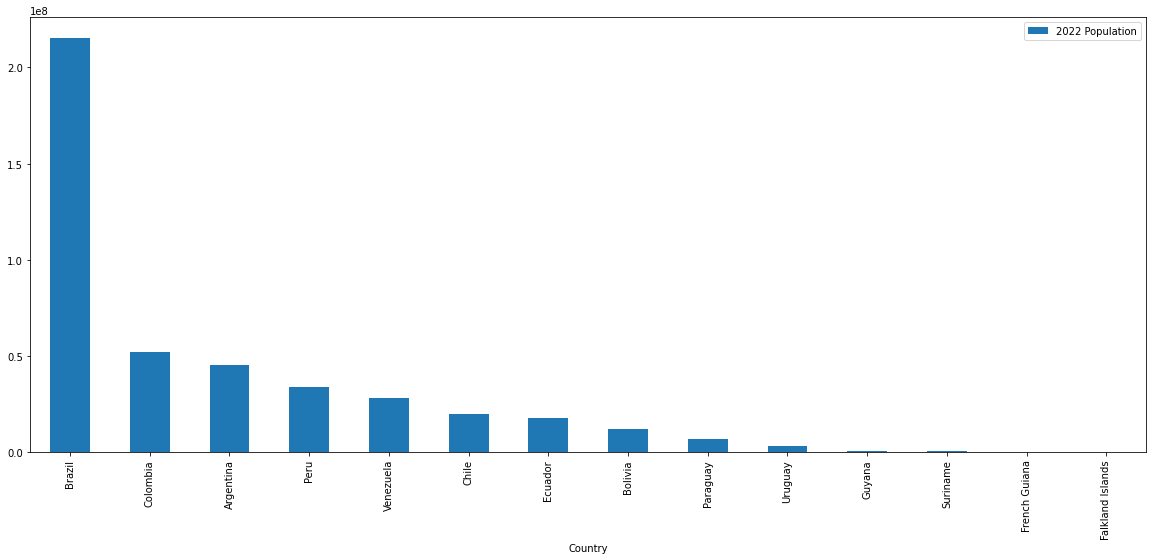

In [ ]:
sa.plot(x='Country', y='2022 Population', kind="bar", figsize = (20,8))

Bar graph of Oceanic population in 2022

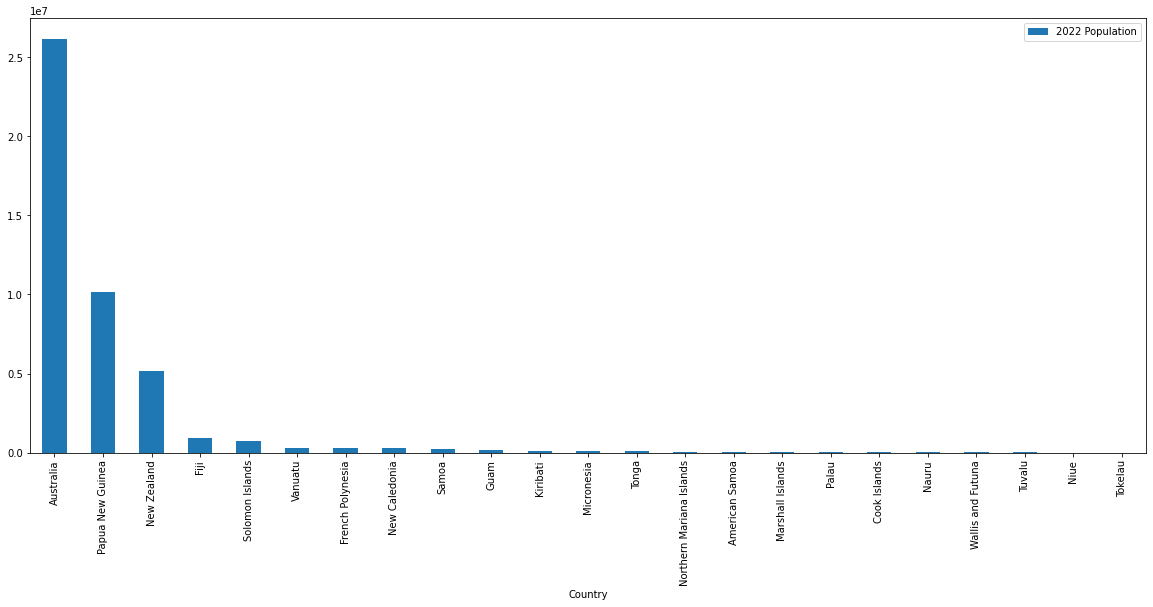

In [ ]:
ocean.plot(x='Country', y='2022 Population', kind="bar", figsize = (20,8))

In [ ]:
allsum = (df.sum())
allsum

Rank                                                                       27495
CCA3                           AFGALBDZAASMANDAGOAIAATGARGARMABWAUSAUTAZEBHSB...
Country                        AfghanistanAlbaniaAlgeriaAmerican SamoaAndorra...
Capital                        KabulTiranaAlgiersPago PagoAndorra la VellaLua...
Continent                      AsiaEuropeAfricaOceaniaEuropeAfricaNorth Ameri...
2022 Population                                                       7973413042
2020 Population                                                       7839250603
2015 Population                                                       7424809761
2010 Population                                                       6983784998
2000 Population                                                       6147055703
1990 Population                                                       5314191665
1980 Population                                                       4442400371
1970 Population             

Creating dataframe with sum of all avaiable population column's

In [ ]:
data2 = [('1970',3694136661 ),
        ('1980',4442400371),
        ('1990',5314191665),
        ('2000', 6147055703),
        ('2010', 6983784998),
        ('2015', 7424809761),
        ('2020', 7839250603),
        ('2022', 7973413042)]
  
  
dftotal = pd.DataFrame(data2, columns =['Year', 'Population'])

In [ ]:
dftotal

,Year,Population
0,1970,3694136661
1,1980,4442400371
2,1990,5314191665
3,2000,6147055703
4,2010,6983784998
5,2015,7424809761
6,2020,7839250603
7,2022,7973413042


Population graph over year's

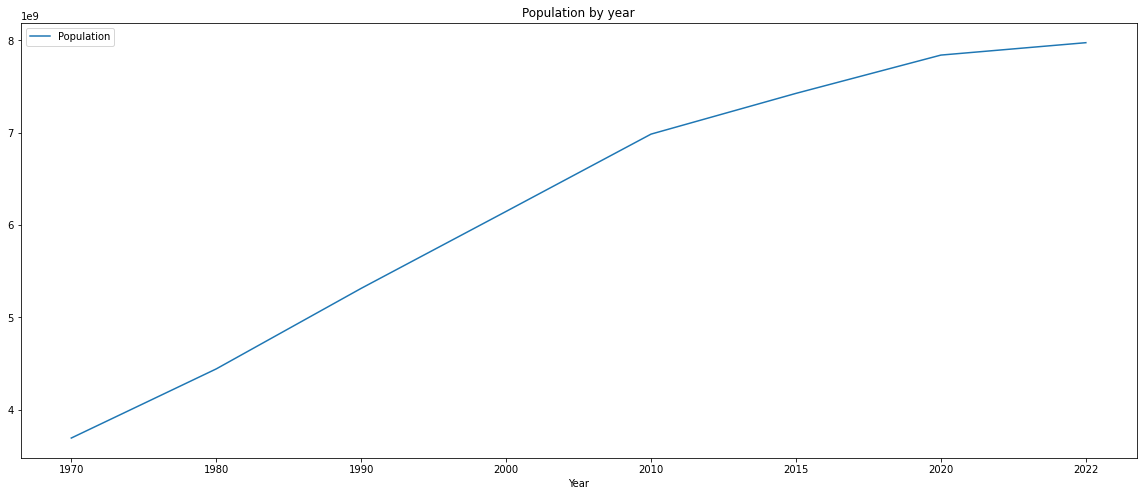

In [ ]:
dftotal.plot.line(x="Year", y="Population", title="Population by year", figsize = (20,8));

Bar graph of continets

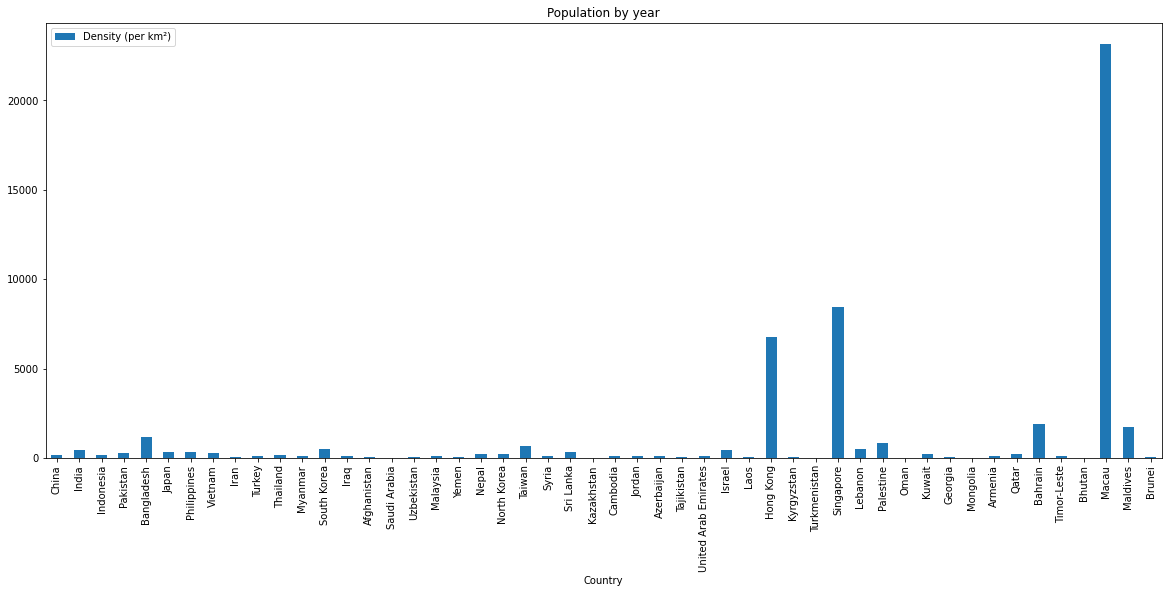

In [ ]:
asi.plot(x="Country", y="Density (per km²)", title="Population by year", kind = 'bar', figsize = (20,8));

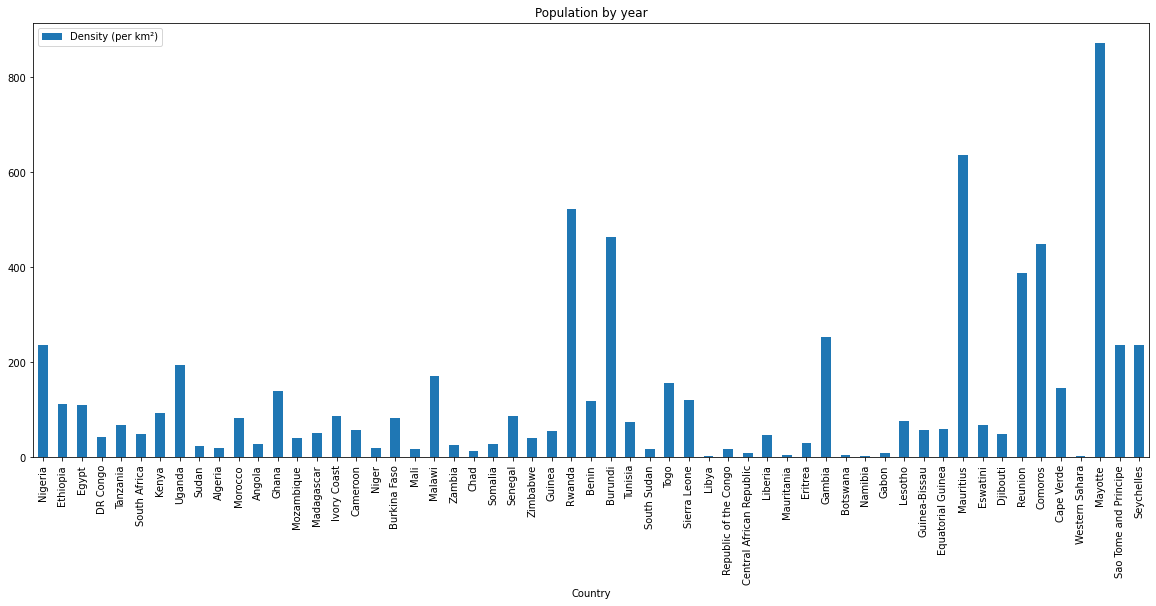

In [ ]:
afr.plot(x="Country", y="Density (per km²)", title="Population by year", kind = 'bar', figsize = (20,8));

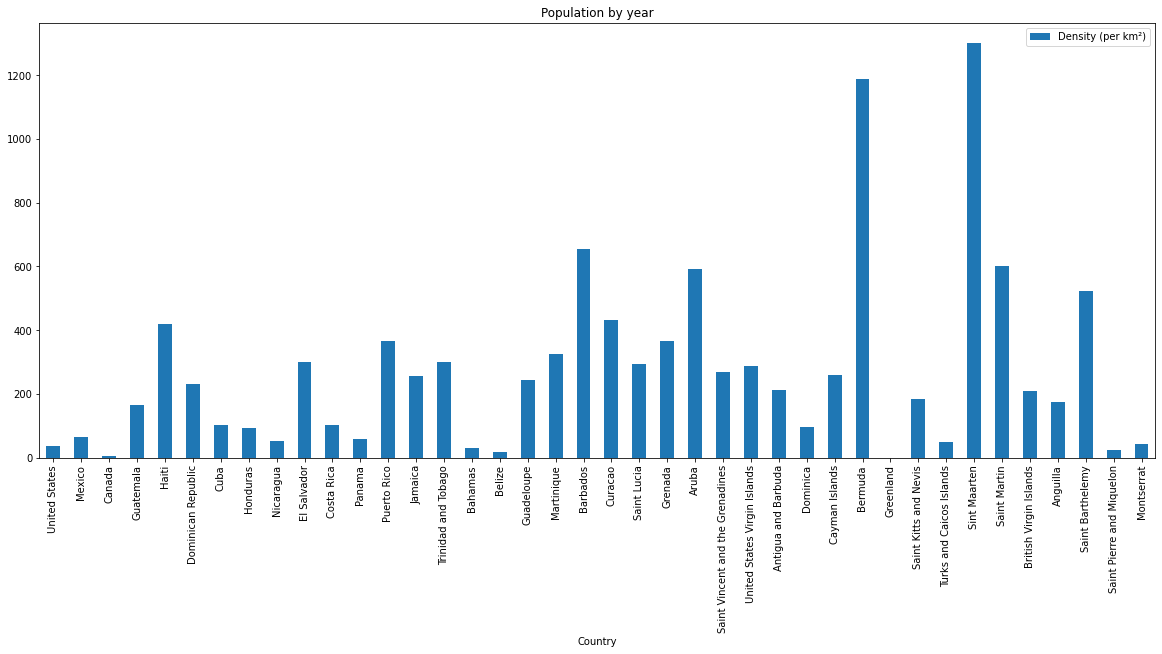

In [ ]:
na.plot(x="Country", y="Density (per km²)", title="Population by year", kind = 'bar', figsize = (20,8));

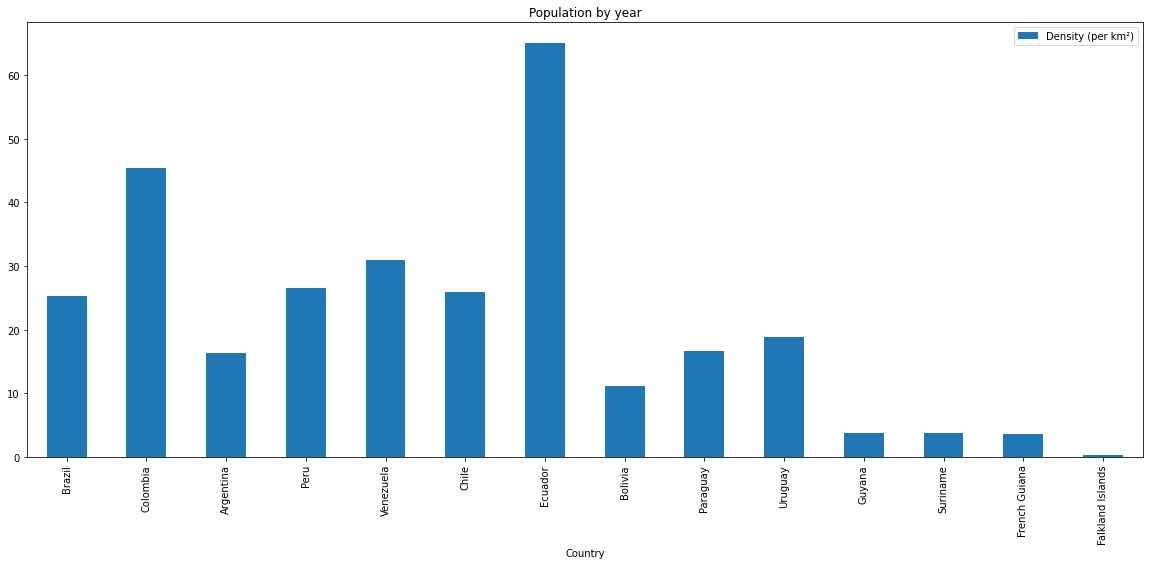

In [ ]:
sa.plot(x="Country", y="Density (per km²)", title="Population by year", kind = 'bar', figsize = (20,8));

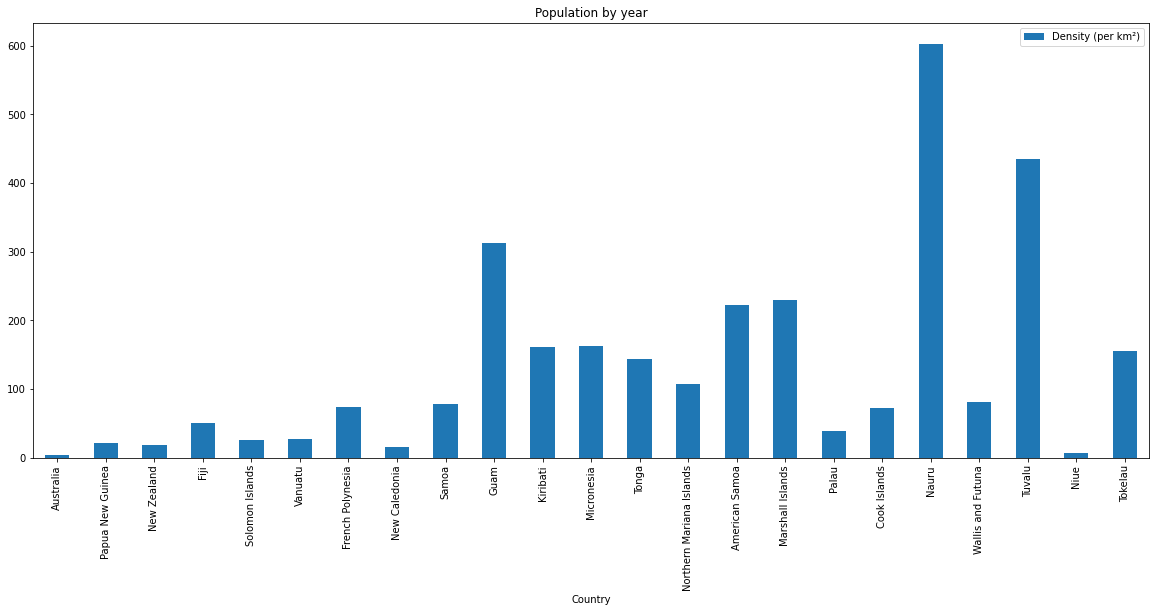

In [ ]:
ocean.plot(x="Country", y="Density (per km²)", title="Population by year", kind = 'bar', figsize = (20,8));

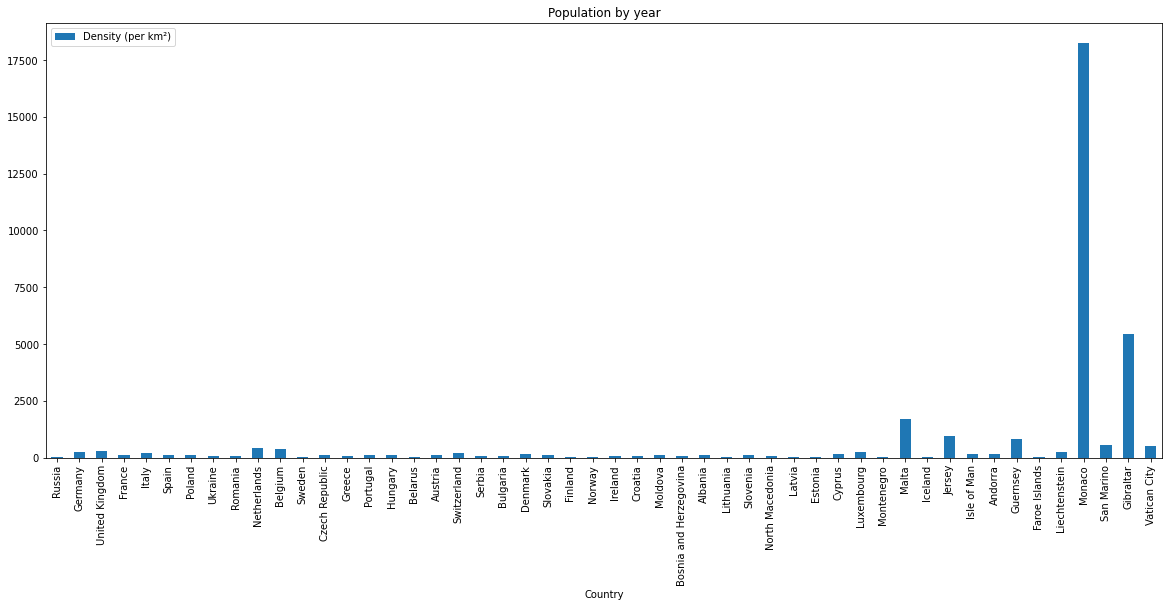

In [ ]:
eur.plot(x="Country", y="Density (per km²)", title="Population by year", kind = 'bar', figsize = (20,8));

Sorting dataframe acording to density

In [ ]:
densitysort = df.sort_values(by=['Density (per km²)'], ascending=False)

High density countries bar graph

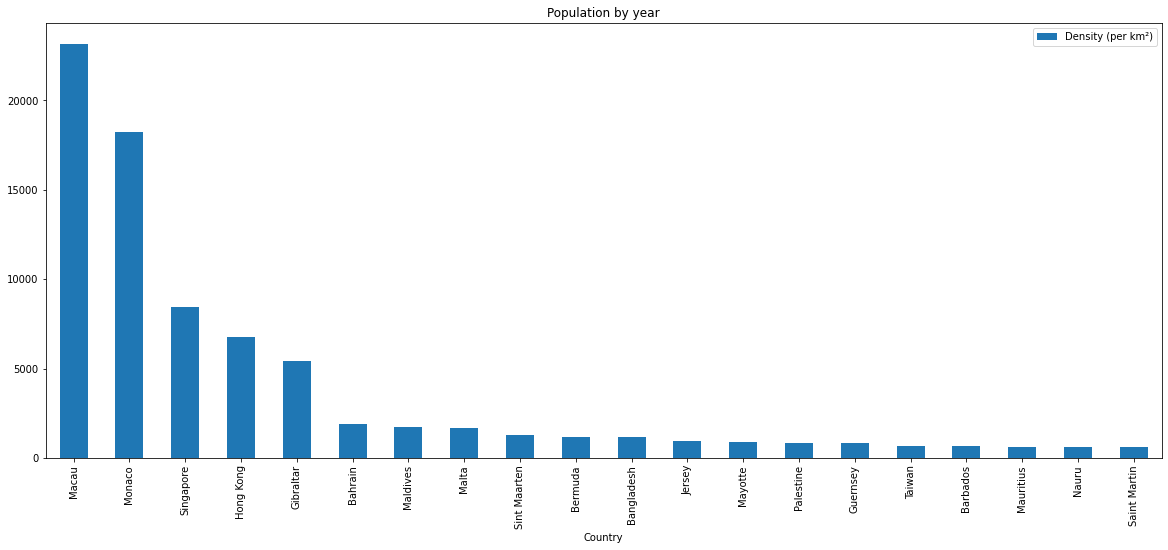

In [ ]:
densitysort[:20].plot(x="Country", y="Density (per km²)", title="Population by year", kind = 'bar', figsize = (20,8));

Least density countries bar graph

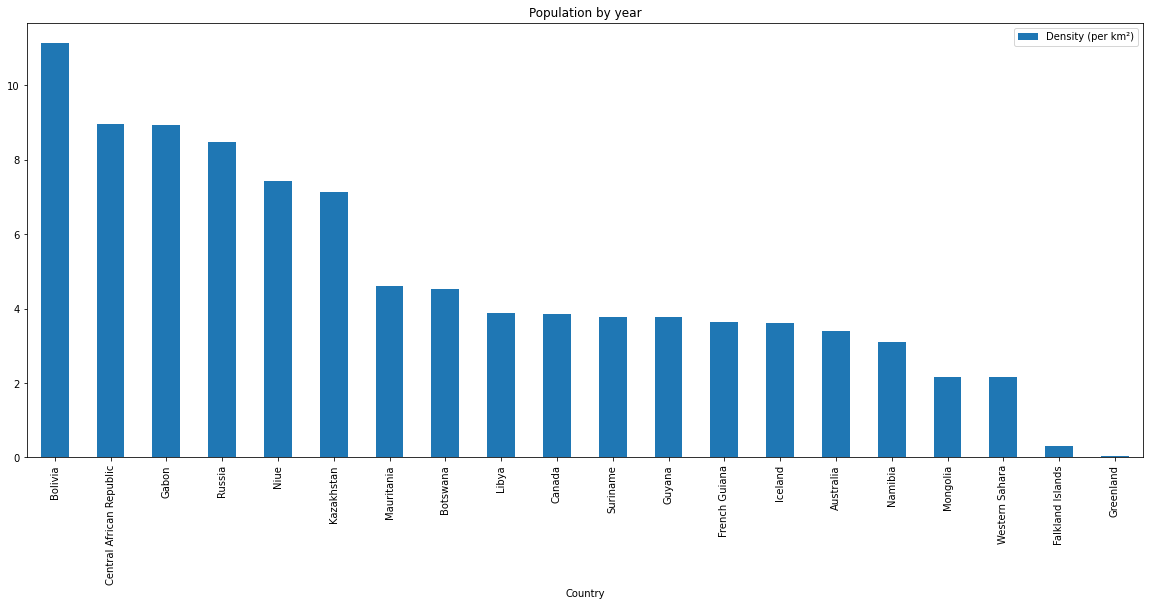

In [ ]:
densitysort.tail(20).plot(x="Country", y="Density (per km²)", title="Population by year", kind = 'bar', figsize = (20,8));

## Summery and Conclusion

---

Insights:

1.No data from Antartica.(No population) 

2.World's total population is 7973413042 in 2022.

3.Top Populated countries are 1.China, 2.India, 3.United States.

4.Asia's Population is 59 % of the world's total foloowed by Africa (18%).

5.Macau is the most densely populated country followed by 'Monaco' and 'Singapore'.

6.Oceanic continent have lowest population comparing to other continents.

7.these are countries with more than 1.   

8.California, Florida, Texas, Oregon, Virginia these are 5 states have highest number of accidents.   

9.496 cities recorded more than 1000 accidents.

10.on weekends more accidents recorded between 1 am to 5 am (Afternoon time)

11.Accidents on weekends are nearly half of the weekdays. 

12.Winter sesson (Nov, Dec) recorded more accidents.

13.Most Accidents occured in between 30 F to 80 F.

14.HeatMap shows high density in costal areas.






---